<a href="https://colab.research.google.com/github/jstro1836/UTDSBA/blob/main/DSBA_Project_ET_EasyVisa_Fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
!pip install nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

     |████████████████████████████████| 1.4 MB 7.5 MB/s 
     |████████████████████████████████| 843 kB 41.8 MB/s 
     |████████████████████████████████| 96 kB 5.1 MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5297 sha256=e609a8137a95b1d76bff44d355c6f45e8024a4fc7be13b84d6e52daa5adcd1d8
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.2 which is incompatible.


## Import Dataset

In [ ]:
#Load the dataset
from google.colab import files
uploaded = files.upload()

Saving EasyVisa.csv to EasyVisa.csv


## Check that the data has been uploaded


In [ ]:
# Read the dataset
visa = pd.read_csv("EasyVisa.csv")

In [ ]:
# copy the data to maintain integrity of original data
data = visa.copy()

In [ ]:
# View first and last five rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


## Check the shape of the data

In [ ]:
data.shape

(25480, 12)

## Check the data types for each column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Observations
* There twelve columns and 25,480 observations. 
* Most columns consist of object data types, with two integer and one float. 

## Check for null and duplicate values

In [ ]:
# Check for null values
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
# Check for duplicates
data.duplicated().sum()

0

In [ ]:
# Convert object data types to categorical
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


### Observations
* There no null values and 0 duplicates. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:

# Summary of continuous columns
data[['no_of_employees','prevailing_wage']].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


### Observations
* Number of employees: The mean and median are signficantly different. This indicates outliers or skewness. 
* Prevailing wage: The mean and median are similar and there appears to be a few outliers above the 74th percentile. 

In [ ]:
# Addressing negative values 
data.loc[data["no_of_employees"] < 0].shape

(33, 12)

In [ ]:
# Convert negative values to absolute
data["no_of_employees"] = abs(data["no_of_employees"]) 

In [ ]:
# Check to see if values were converted to absolute value
data[['no_of_employees','prevailing_wage']].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [ ]:
# Drop the case id since it won't be of value to the prediction model
data.drop(columns=["case_id"], inplace=True)

In [ ]:
# checking the number of unique cases
data.nunique()

continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [ ]:
# Check the count of each unique category

cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Observations on number of employees


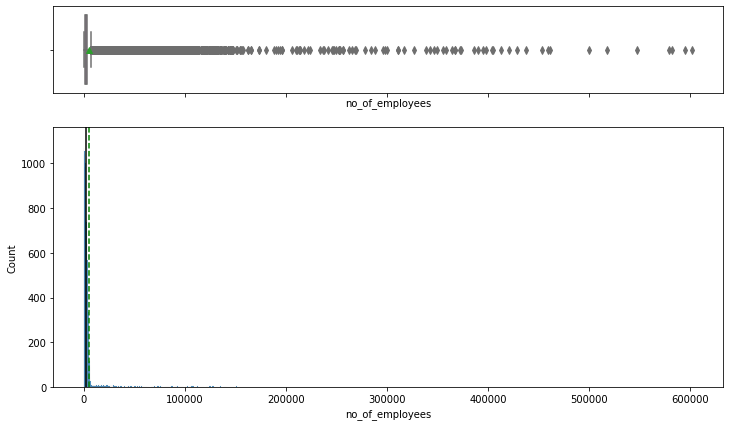

In [ ]:
histogram_boxplot(data, "no_of_employees")

* The distribution is highly skewed to the right. 
* There are many outliers in this distribution. 


## Observations on prevailing wage

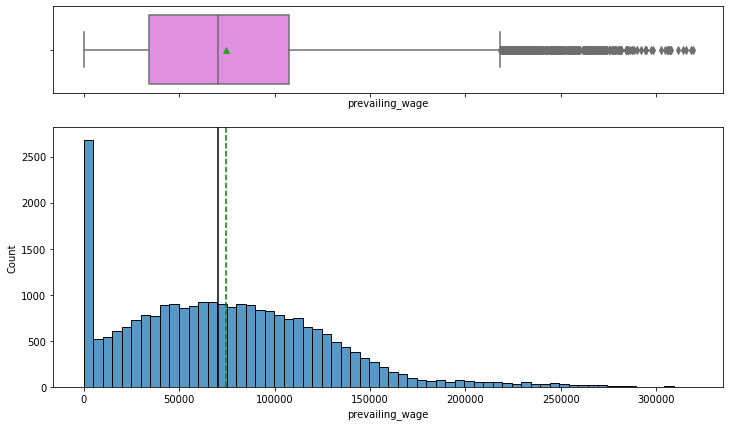

In [ ]:
histogram_boxplot(data, "prevailing_wage")

* The distribution is right skewed and wide tailed.
* Most values appear to be concentrated around 75,000.
* The highest count is closest to zero and significantly more than other values. This could signify a cohort such as recent college graduates. Further analysis is needed. 

In [ ]:
# Check to see how many observations have less than 100 of prevailing wage.
data.loc[data["prevailing_wage"] < 50].shape

(90, 11)

## Observations on continent

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

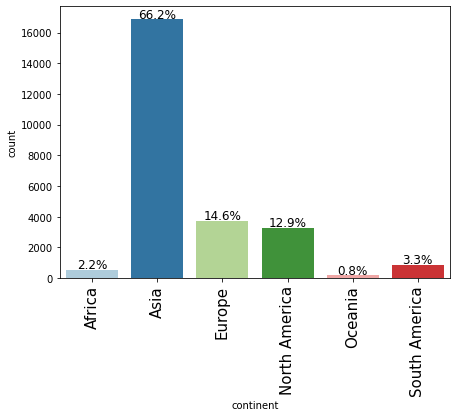

In [ ]:
labeled_barplot(data, "continent", perc=True)

* The large majority of people are from Asia.

## Observations of education of employee

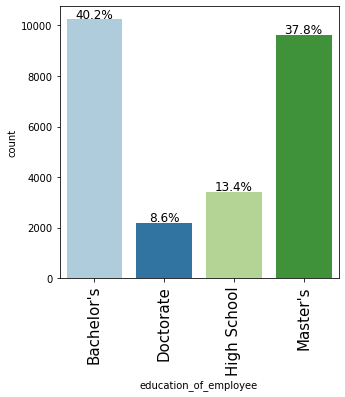

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

* 78 percent of people have at least a bachelor's degree. This indicates that people with higher education are looking for careers where demand is high and pay is competitive. 
* Does education play a role in visa approval?

## Observations on job experience

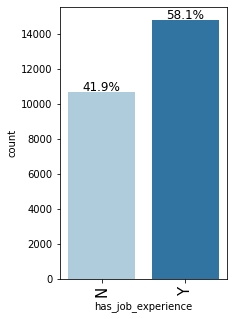

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

* ~42 percent of applicants do not have job experience while ~58 percent does. 
* It appears that both new graduates and experienced professionals see opportunity working abroad in the U.S. 
* Qualitative feedback would help understand why each cohort is seeking employment in the U.S. 

## Observations on job training

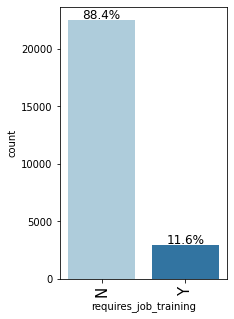

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)

* Most employees do not need job training. 

## Observations on region of employment


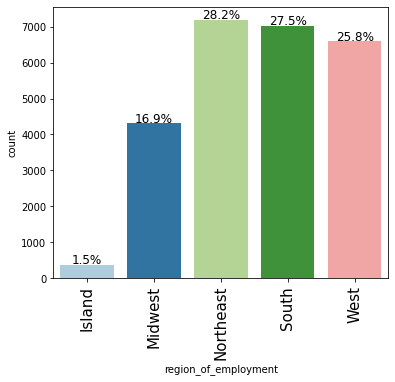

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

* Most applicants intend on working in regions that have higher economic output. 

## Observations on unit of wage

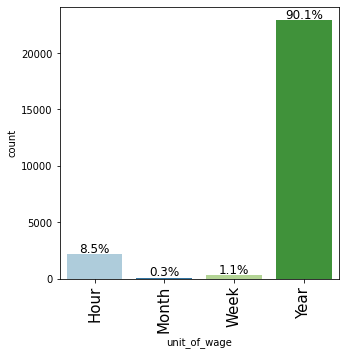

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)

* Most applicant wages are measured by year followed by hour. 
* This indicates that most applicants are salary based and work in professional rather than service roles that are paid hourly. 

## Observation on case status

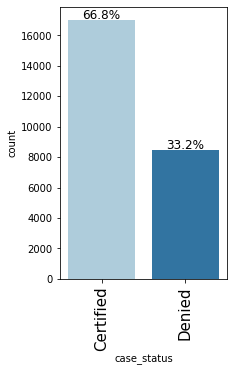

In [ ]:
labeled_barplot(data, "case_status", perc=True)

* About one-third of applicants are certified. 

## Bivariate Analysis

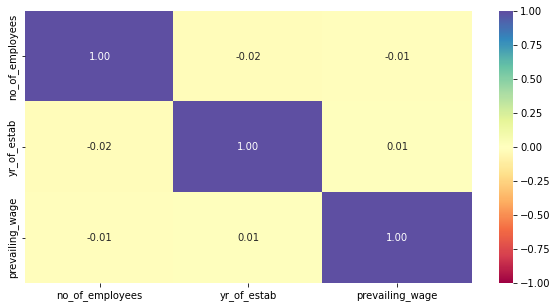

In [ ]:
# Heatmap to show correlation between variables
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) 
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
## Understanding education impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


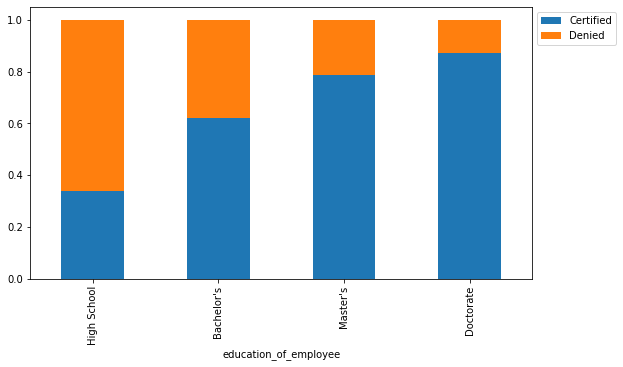

In [ ]:
stacked_barplot( data, "education_of_employee", "case_status")

* It appears that applicants with higher education have a higher probability of visa certification. 

## Understanding impact of job experience on visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


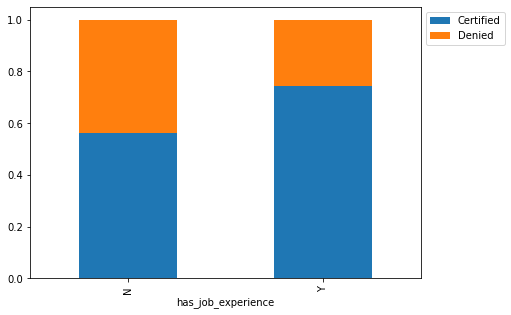

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

* Applicants who have job experience appear to be more likely to have their visa certified. 

## Understanding visa certifications by region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


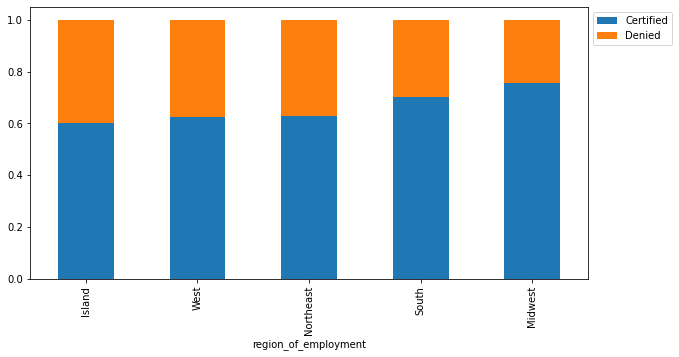

In [ ]:
stacked_barplot(data, "region_of_employment", "case_status")

* It looks like applicants for the South and Midwest are more likely to have visas certified. This could be because demand is higher in those specific locations.
* Other factors should be considered in addition to the region an applicant is applying for. 

## Understanding visa certifications by continent


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


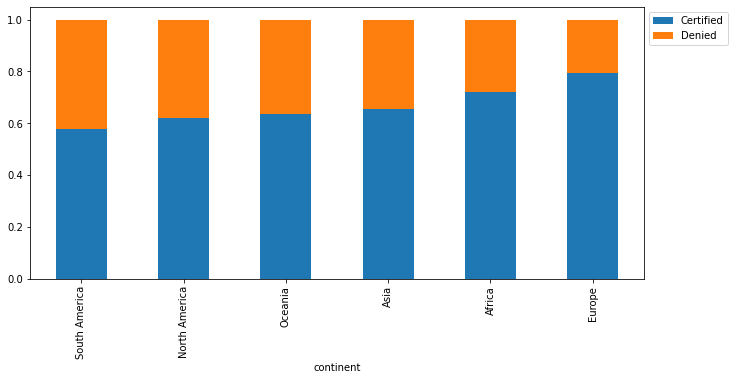

In [ ]:
stacked_barplot(data, "continent", "case_status")

* Europe, Africa, and Asia have slightly higher acceptance rates than Oceania, North America, and South America. 
* Europe has a relatively high acceptance rate, but the majority of applicants come from Asia. 

## Understanding education across each region


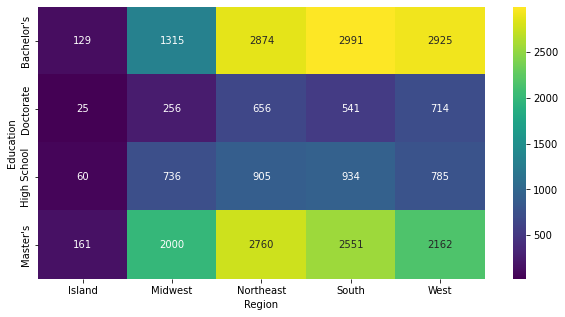

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis"
) 

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

* More applicants with doctorates applied to the Northeast, South, and West. 
* The Midwest and Island saw fewer applicants with Bachelor degrees. 
* More master's and bachelor's applied to the islands compared to other education categories. 

## Understanding relationship between prevailing wage and case status


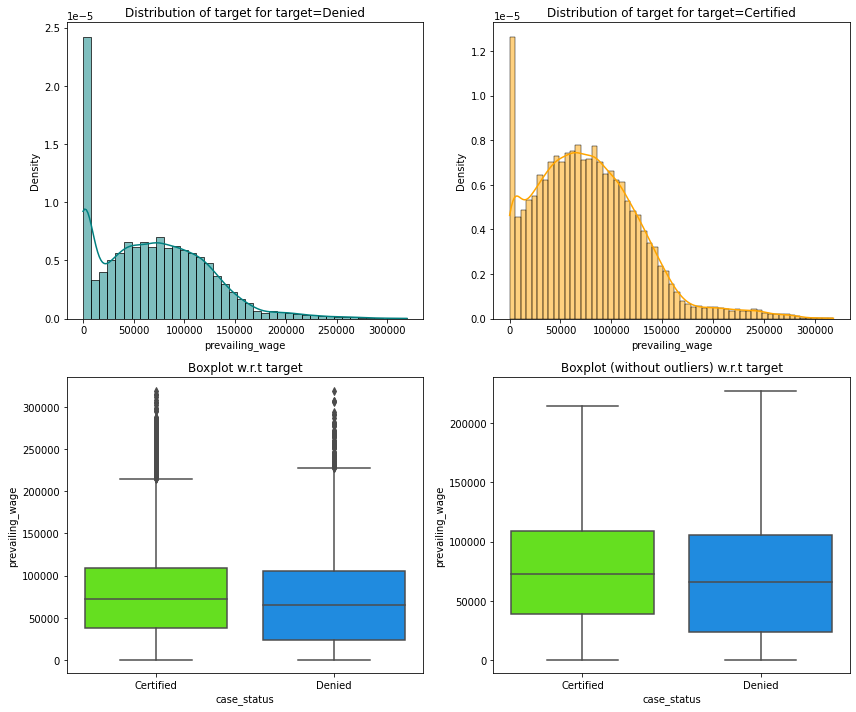

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

* It appears that the prevailing wage distributions are similar for both denied and certified

## Understanding prevailing wages by applicant regions

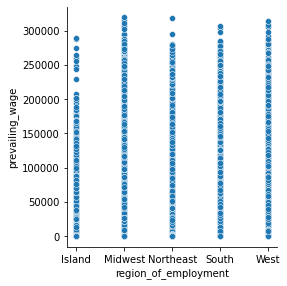

In [ ]:
sns.pairplot(
    data,
    x_vars=["region_of_employment"],
    y_vars=["prevailing_wage"],
    height=4,
    aspect=1
    );

* Prevailing wages seem about even across each region.

## Understanding the impact of unit wage on certification

---



case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


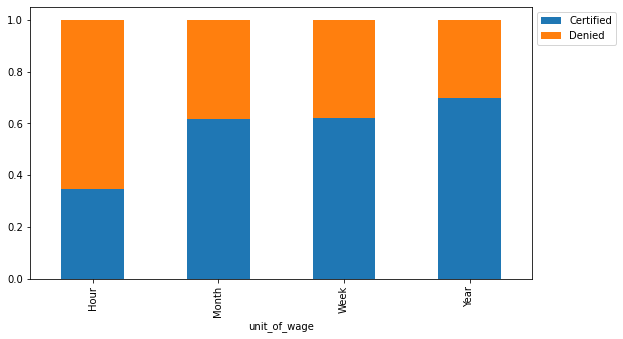

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

* Annual salaries have the highest rate of certification, while the hourly rate has the lowest. 
* This suggests that yearly unit of wages are more likely to receive certification considering other factors. 



## Checking for outliers

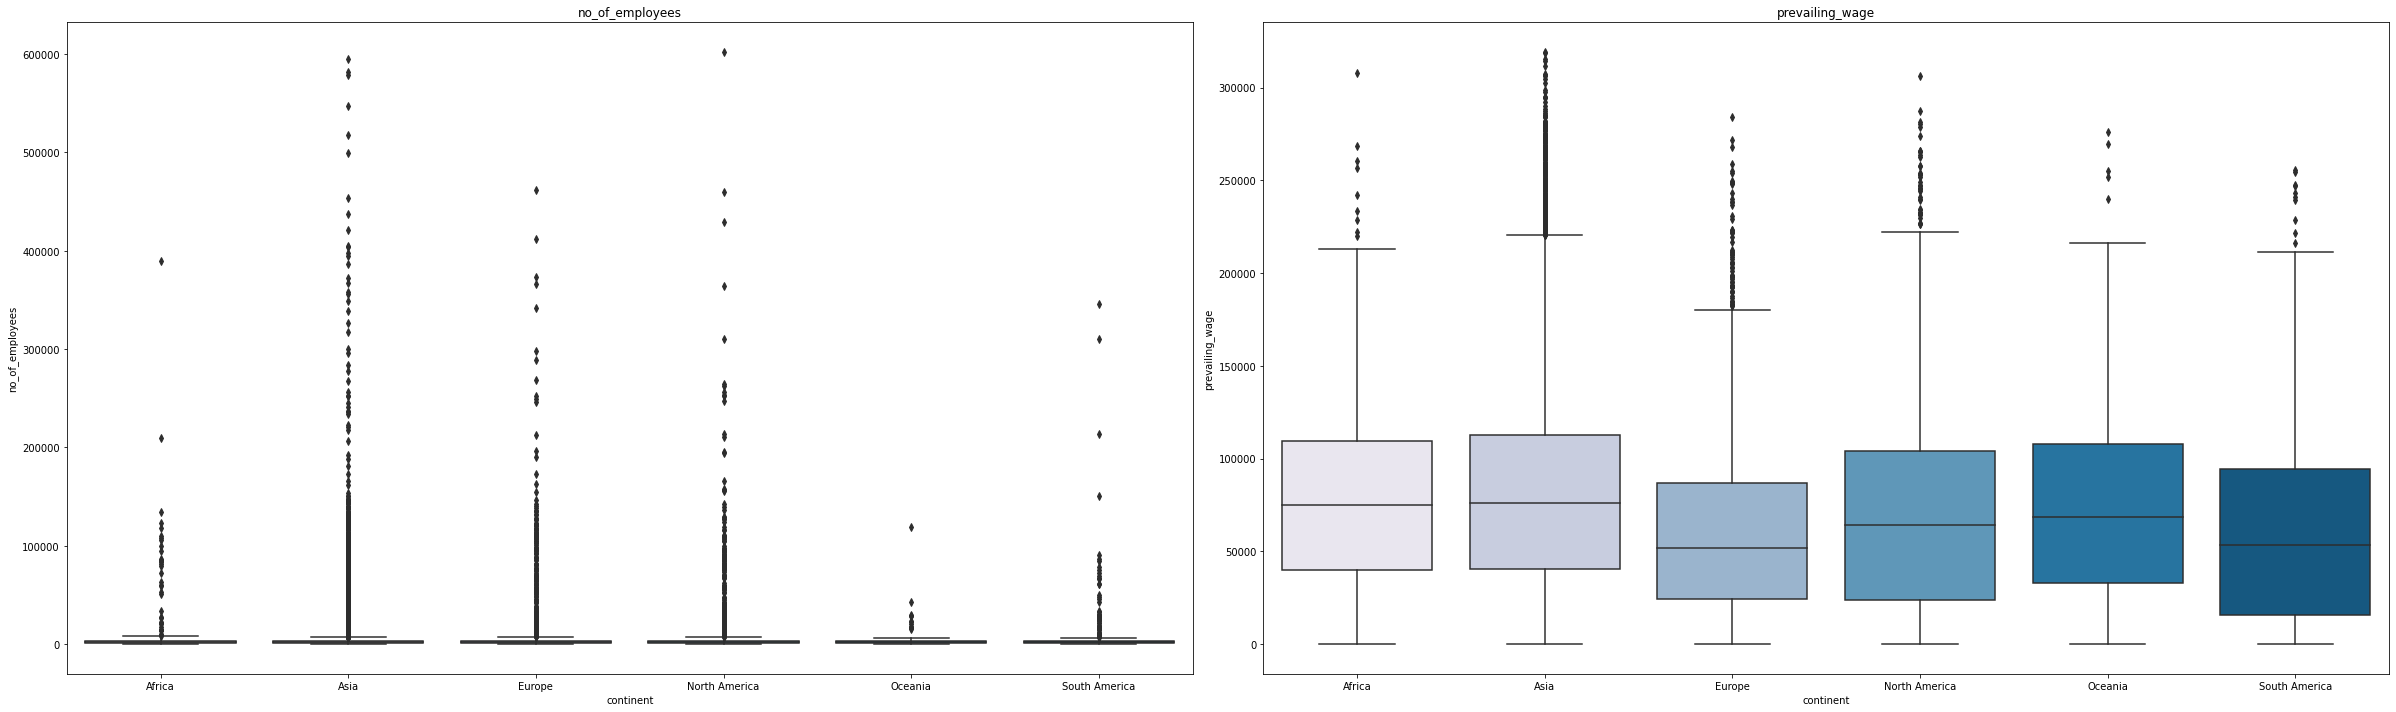

In [ ]:
cols_1 = data[['no_of_employees', 'prevailing_wage']].columns.tolist()
plt.figure(figsize=(50,10))

for i, variable in enumerate(cols_1):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['continent'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* There are a significant amount of outliers for each numeric column. 

## Data preparation for modeling

In [ ]:
# Convert objects to categorical

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop("case_status", axis=1) ## Complete the code to drop case status from the data
Y = data["case_status"]


X = pd.get_dummies(X,drop_first=True)  ## Complete the code to create dummies for X 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [ ]:
X.head(15)

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1
5,2339,2012,78252.1400,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1
6,4985,1994,53635.3900,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
7,3035,1924,418.2298,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
8,4810,2012,74362.1900,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
9,2251,1995,67514.7600,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


In [ ]:
Y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [ ]:
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

## Model Evaluation

### The model can misclassify the following ways:
* Predicting an employee's visa will certified and does not.
* Predicting that an employee's visa will not be certified but does. 

### Which peformance metric is important?
* Both are important because they have implications for the economy. 
* If we predict an employee will be certified and does not, the market loses out on foreign talent. 
* If we predict an employee won't be approved but does, then it could have additional costs for the market or economy. 



In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Model

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.66},random_state=1)

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.66}, random_state=1)

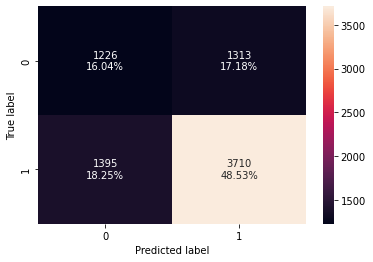

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

**Confusion Matrix**

* Applicant received visa and the model predicted it would be certified :  True Positive (observed=1,predicted=1)

* Applicant did not receive visa and the model predicted it would be certified : False Positive (observed=0,predicted=1)

* Applicant did not receive visa and the model predicted it would not be certified : True Negative (observed=0,predicted=0)

* Applicant received a visa and the model predicted that it would not be certified : False Negative (observed=1,predicted=0)

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.645735  0.726738   0.738602  0.732622


* Model works well with training data. 
* Model is unable to generalize well to the test data.

## Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

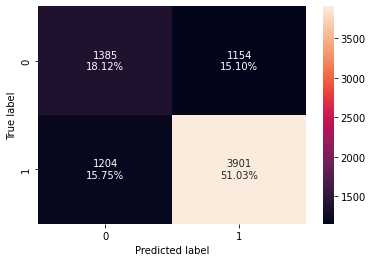

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


* Bagging classifier is overfitting on the training set and is not performing well on the test set on either recall or precision.

### Bagging Classifier with Weighted Decision Tree

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.66},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                      1: 0.66},
                                                        random_state=1),
                  random_state=1)

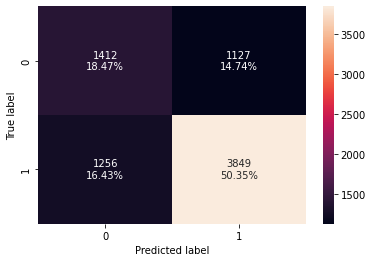

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [ ]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.983629  0.983547   0.991873  0.987693


In [ ]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.688252  0.753967   0.773513  0.763615


* The model performs well on the training data but is not generalized well to the test data regarding precision and recall. 

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

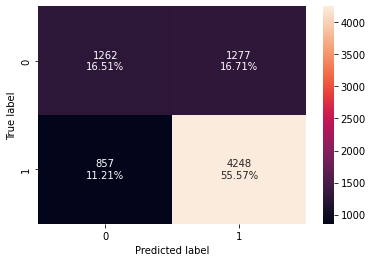

In [ ]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


* The RF model performs well with the training data regarding both precision and recall. 
* On the test data, recall performs slightly better than precision. 

### Random forest with class weights

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.33,1:0.66}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.66}, random_state=1)

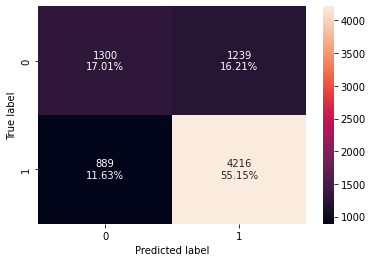

In [ ]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [ ]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.721612  0.825857   0.772869  0.798485


* There is only a slight increase in precision. 
* Recall actually decreases with class weights.

## Model Tuning

Grid search will be used to compute optimal values of hyperparameters. 

### Decision Tree Tuning

In [ ]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.33,1:0.66},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.66}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

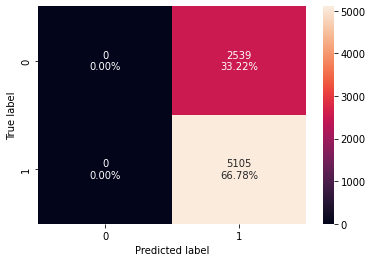

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901


In [ ]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847


* Recall has performed extremely well for both training and data set. 
* Precision did not perform well on either the training or test set.

## Bagging Classifier Tuning

In [ ]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.33,1:0.66},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.33,
                                                                                 1: 0.66},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [ ]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                      1: 0.66},
                                                        random_state=1),
                  max_features=1, n_estimators=5, random_state=1)

In [ ]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901


In [ ]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847


* Recall performs extremely well on both the training and test set. 
* Precision is not performine well on either training or test set. 



## Random Forest Tuning

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=5,
                       n_estimators=20, oob_score=True, random_state=1)

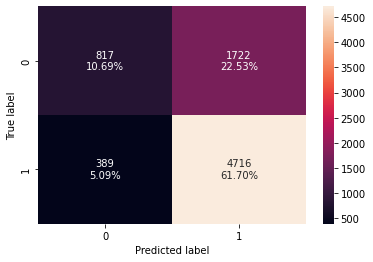

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [ ]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.735591  0.925963   0.742079  0.823885
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.723836  0.9238   0.732526  0.817119


* Both recall and precision are about the same for training and test data. 
* F1 score declined slightly in test data and is still low. 



## AdaBoost Classifier

   Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
   Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


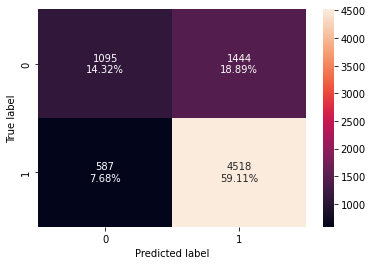

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adabost provides generalization but the F1 score, precision, and recall are too low. 

## AdaBoost Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)





AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861
   Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397


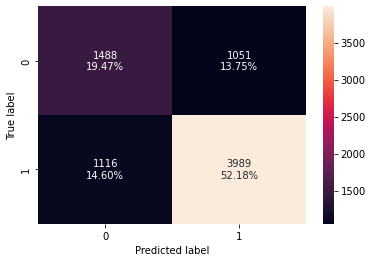

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* Peformance is generalized to the test set but scores are still too low. 

## Gradient Boosting Classifier

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


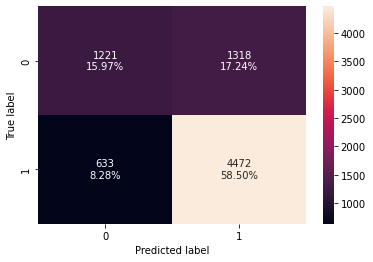

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* Performance is generalized to test set but scores are still too low. 

### Gradient Boosting Hyperparameter Tuning



In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.764017  0.882649   0.789059  0.833234
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379


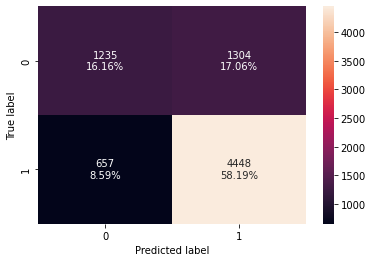

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* Model performance generalizes to test and there isn't much change.

## XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756279  0.883573   0.780513  0.828852
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744636  0.877375   0.771576  0.821082


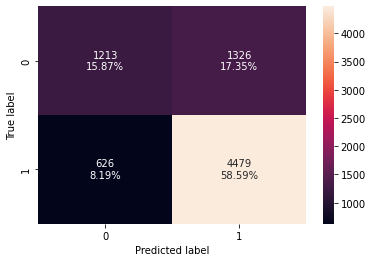

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* Model generalizes to test data across all performance metrics. 

### XGBoost Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756504  0.883069   0.780995  0.828901
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.744244  0.8762   0.771739  0.820659


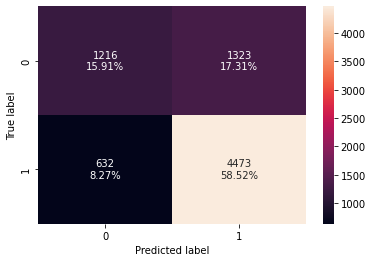

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* Not much change from tuning the XGBoost model.

## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_split=5,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                   

Training performance:
    Accuracy    Recall  Precision       F1
0  0.760877  0.883153   0.785501  0.83147
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743721  0.872478   0.772995  0.819729


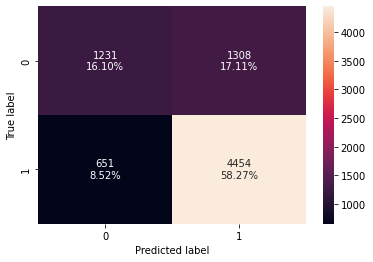

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* The stacking classifier provides a similar performance to XGBoost, however, has slightly less F1 score than XGBoost model. 

## Model Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        rf_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.667919,0.985198,0.667919,0.999944,0.735591,0.738226,0.718995,0.758802,0.764017,0.756279,0.756504,0.760877
Recall,1.0,1.000000,0.985982,1.000000,0.999916,0.925963,0.887182,0.781247,0.883740,0.882649,0.883573,0.883069,0.883153
Precision,1.0,0.667919,0.991810,0.667919,1.000000,0.742079,0.760688,0.794587,0.783042,0.789059,0.780513,0.780995,0.785501
F1,1.0,0.800901,0.988887,0.800901,0.999958,0.823885,0.819080,0.787861,0.830349,0.833234,0.828852,0.828901,0.831470


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_estimator_model_test_perf.T,
        rf_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.645735,0.667844,0.691523,0.667844,0.720827,0.723836,0.734301,0.716510,0.744767,0.743459,0.744636,0.744244,0.743721
Recall,0.726738,1.000000,0.764153,1.000000,0.832125,0.923800,0.885015,0.781391,0.876004,0.871303,0.877375,0.876200,0.872478
Precision,0.738602,0.667844,0.771711,0.667844,0.768869,0.732526,0.757799,0.791468,0.772366,0.773296,0.771576,0.771739,0.772995
F1,0.732622,0.800847,0.767913,0.800847,0.799247,0.817119,0.816481,0.786397,0.820927,0.819379,0.821082,0.820659,0.819729


* Considering recall is the most important performance metrics, both the tuned decision tree and and tuned bagging classifier performed extremely well. These are the best models to use for predicting whether or not an applicant will receive a visa. If we we predict that an applicant will not be chosen, and yet they should have been, then the costs are higher because a key role was not filled. This economic impact is greater than operational costs. 
* While precision is still important, the bagging classifier performed the best. If we predict an applicant will receive their visa and they don't, then we have wasted resources. Operational cost are still important, but the economic impact of a false negative is greater.   
 

## Random Forest Features Importance

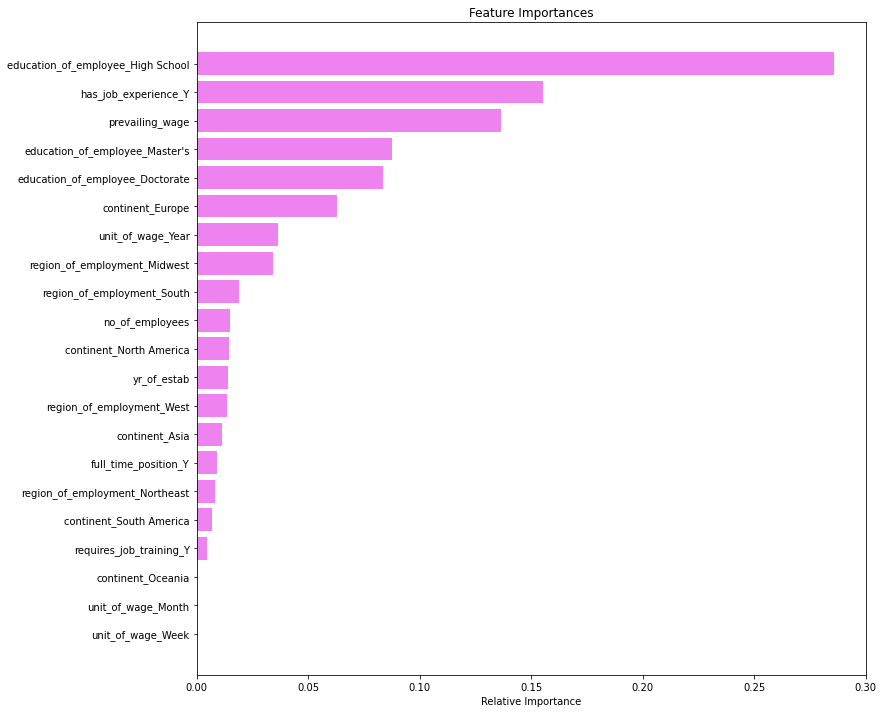

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* High school is the most important feature for prediction followed by having job experience, prevailing wage, master's education, and doctorate education. 

## Actionable Insights and Recommendations

* We have developed a predictive model that the Office of Foreign Labor Certification (OFLC) can use to identify suitable candidates for visa approval. 
* Applicants who have only high school education are not likely to receive a visa. The demand for jobs require higher education and skills. There is an opportunity to develop programs that provide high school graduates will specific skills such as front-end development or others that are in high demand and do not require advanced degrees. 
* Job experience is another important factor determining if a visa will be certified. This indicates that employers in the U.S. need foreign employees who already possess the necessary skills and experience. There should be a requirement for job experience prior to applying for specific roles. For applicants who have the education, they should at a minimum seek an internship or employment prior to applying for a visa. 
* Advanced education matters. These applicants typically already have job experience and the skills required for roles in the U.S. market. This cohort is the ideal candidate to receive a certified visa. 
* There is opportunity to understand in more detail the types of roles or specialty areas applicants hold. This additional feature will further enhance our predictive model.   


In [ ]:
%%shell
jupyter nbconvert --to html /content/DSBA_Project_ET_EasyVisa_Fullcode.ipynb

[NbConvertApp] Converting notebook /content/DSBA_Project_ET_EasyVisa_Fullcode.ipynb to html
[NbConvertApp] Writing 1171556 bytes to /content/DSBA_Project_ET_EasyVisa_Fullcode.html
